<a href="https://colab.research.google.com/github/ParbatiDebbarma/Jamboree-Education/blob/main/Jamboree_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Jamboree Education: Linear Regression**

## **About Jamboree**

Jamboree has helped thousands of students to make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### **Problem Statement**

* Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.
* Predict one's chances of admission given the rest of the variables.

### **Column Profiling**

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

In [ ]:
# importing modules for analysing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

# Turning off all warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Jamboree_Admission.csv')

#displaying first 5 rows of the dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.dtypes #datatype of all the columns

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
#No. of Rows and columns of the dataset
print(f'No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}')

No. of Rows : 500
No. of Columns : 9


There are 500 roes and 9 columns in the dataset

In [ ]:
#Checking for nulls in the dataset
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


There are no nulls in the dataset

In [ ]:
#Checing for duplicates in the dataset
df.duplicated().sum()

0

There are no duplicates in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe() #description of the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
#dropping unneccessary columns
df.drop(['Serial No.'], axis=1, inplace=True)

Here, the column Serial Number doesn't contribute in either analysis or prediction. So its better to drop the column from the dataset.

In [ ]:
df.head() #checking the dataset after dropping unimportant column

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# **Univariate Analysis**

In [ ]:
#removing unneccessary spaces from string
df.columns = df.columns.str.strip()

In [ ]:
#displaying all columns
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

Now we can see the unnecessary space from the name of the column 'LOR' has been removed

In [ ]:
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA'] #numerical columns
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research'] #categorical columns
target = 'Chance of Admit'

**Distribution of Numerical Variables**

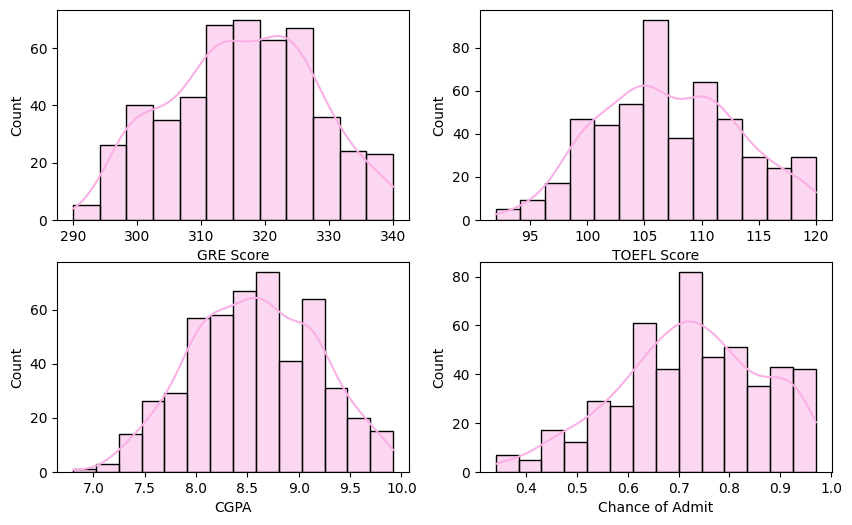

In [ ]:
# checking distribution of each numerical variable
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(10,6)) #seting the figure size
index = 0 #initializing the index

palette = sns.color_palette('pastel') #choosing the colour palette

for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col], color = palette[6])
        index += 1
    break

sns.histplot(df[num_cols[-1]], kde=True, ax=axs[1,0], color = palette[6])
sns.histplot(df[target], kde=True, ax=axs[1,1], color = palette[6])
plt.show()

**Distribution of categorical Variables**

In [ ]:
# checking unique values in categorical variables
for col in cat_cols:
    print("Column:  {:18}   Unique values: {}".format(col, df[col].nunique()))

Column:  University Rating    Unique values: 5
Column:  SOP                  Unique values: 9
Column:  LOR                  Unique values: 9
Column:  Research             Unique values: 2


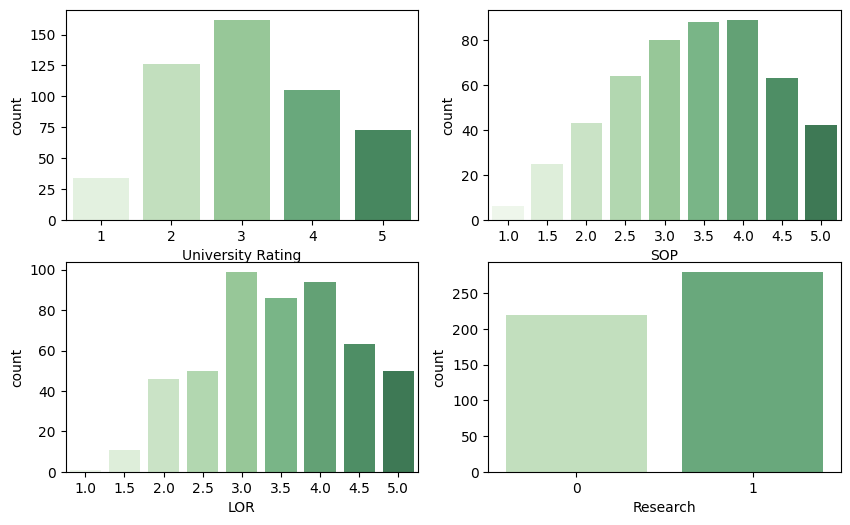

In [ ]:
# countplots for categorical variables
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 6))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8, palette="Greens")
        index += 1

plt.show()

### **Outliers detection using Boxplot**

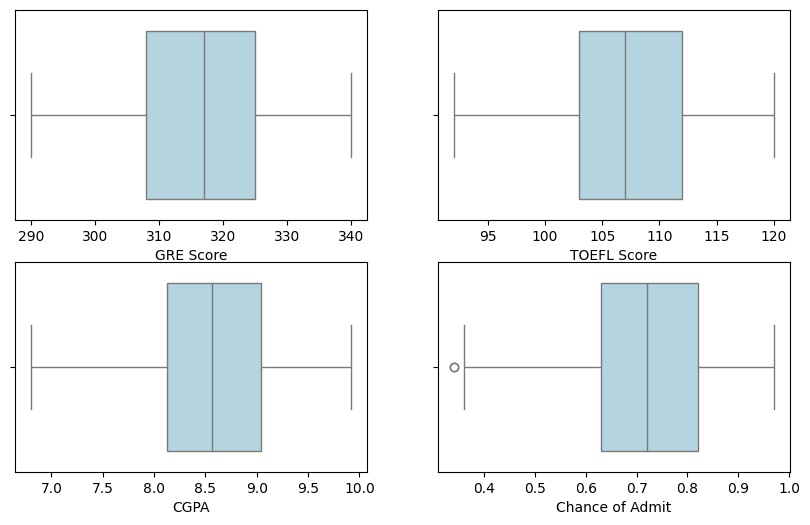

In [ ]:
# Checking for outliers using boxplots for numerical columns
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 6))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0, index], color='lightblue') # Plotting boxplot for the numerical column
    index += 1

sns.boxplot(x=num_cols[-1], data=df, ax=axs[1, 0], color='lightblue') # Plotting boxplot for the last numerical column
sns.boxplot(x=target, data=df, ax=axs[1, 1], color='lightblue') # Plotting boxplot for the target variable
plt.show()


There are no outliers present in the dataset

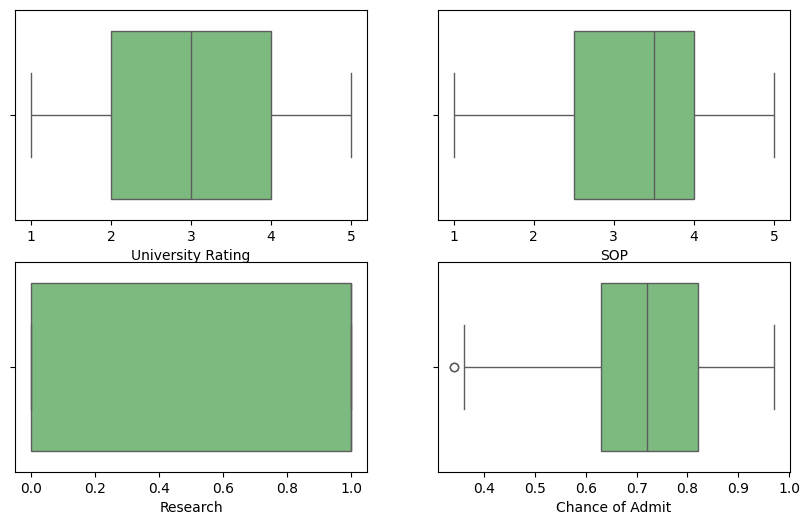

In [ ]:
# checking for outliers using boxplots for categorical columns
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 6))

index = 0
for col in range(cols):
    sns.boxplot(x=cat_cols[index], data=df, ax=axs[0,index], palette="Greens")
    index += 1

sns.boxplot(x=cat_cols[-1], data=df, ax=axs[1,0], palette="Greens")
sns.boxplot(x=target, data=df, ax=axs[1,1], palette="Greens")
plt.show()

Other than LOR there no outliers in other features. But we will not be treating LOR as it is one of the ratings given on scale 0-5.

# **Multivariate Analysis**

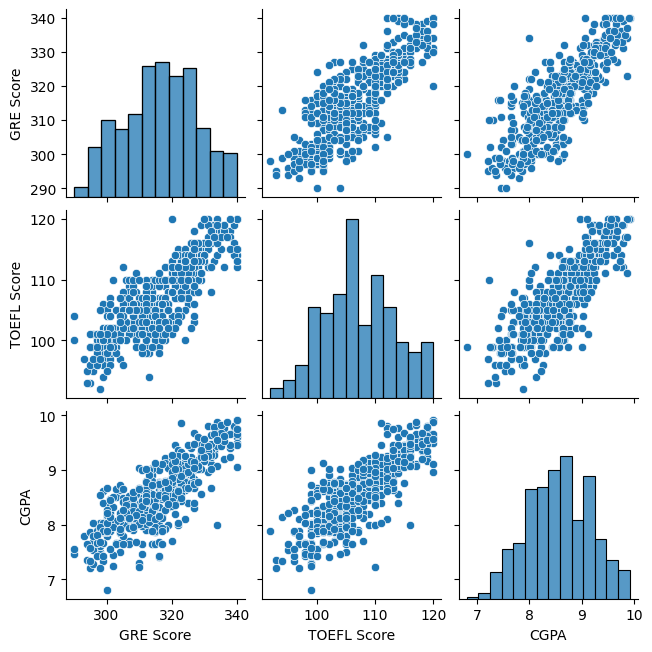

In [ ]:
sns.pairplot(df[num_cols], height = 2.2) # Plotting pairplot for numerical columns
plt.show()

* GRE Score, TOEFL Score, and CGPA show strong linear relationships, indicating
they are positively correlated.
* Most students have GRE Scores in the range of 300–330, and TOEFL Scores around 100 - 115.
* CGPA values are clustered near the higher end, around 9.0–10.0, suggesting strong academic performance.
* The relationships between the variables are consistent and show no obvious outliers disrupting the trends.

### **Visualizing the Impact of Academic Metrics on Admission Probability**

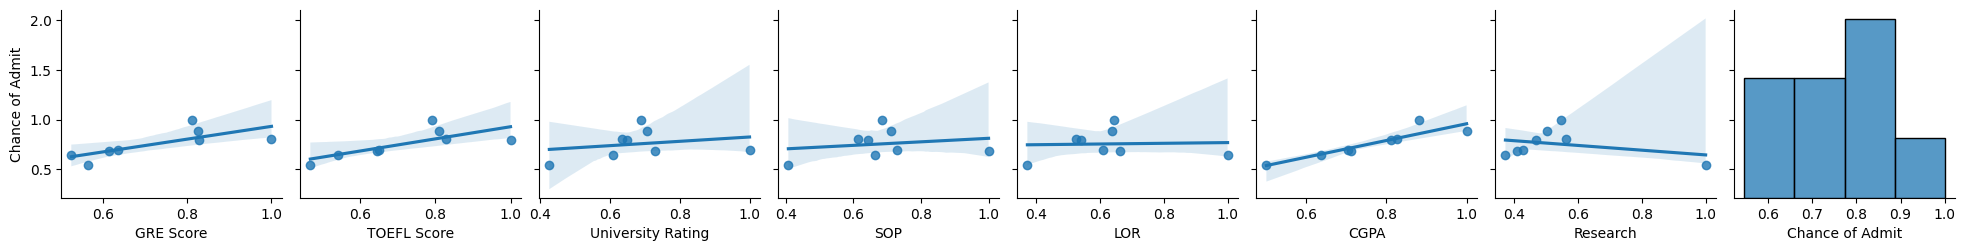

In [ ]:
# Creating a pairplot to visualize relationships between the variables
sns.pairplot(
    df.corr(),            # Passing the correlation matrix of the DataFrame as the data source
    y_vars='Chance of Admit',  # Setting 'Chance of Admit' as the dependent (y-axis) variable
    kind='reg')           # Using regression plots to show linear relationships

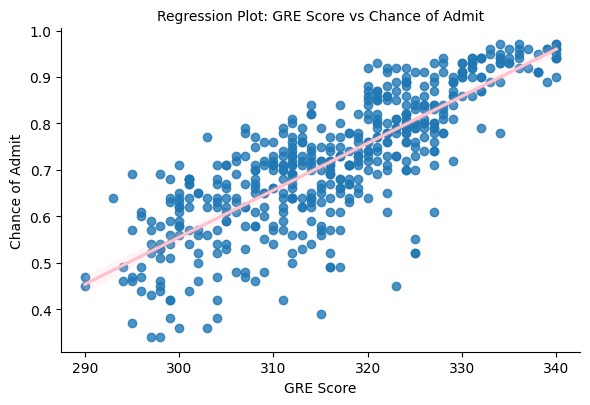

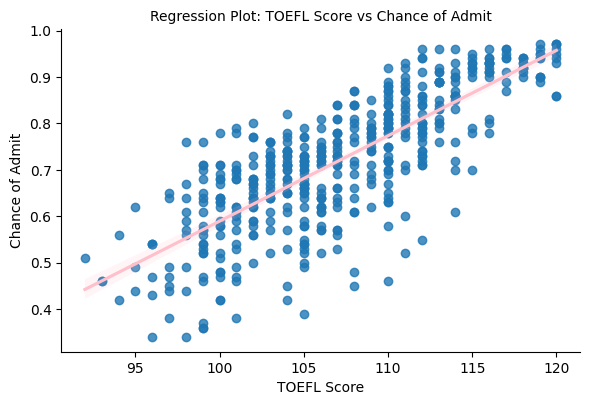

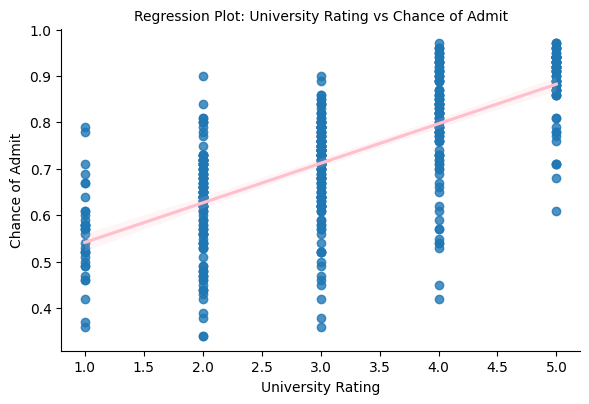

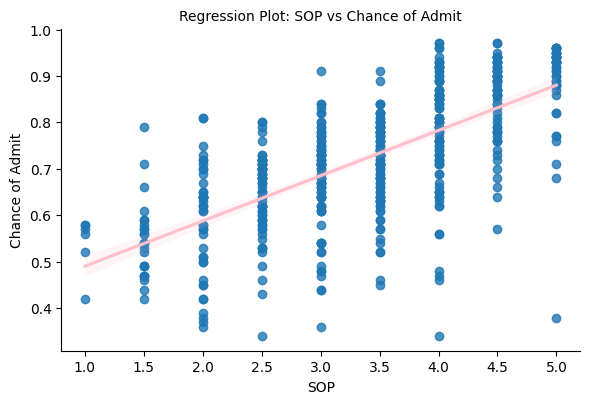

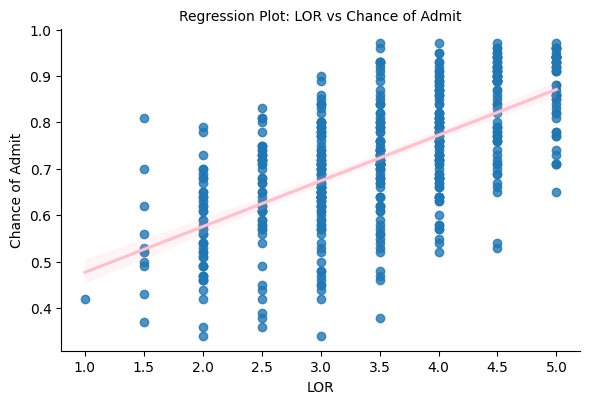

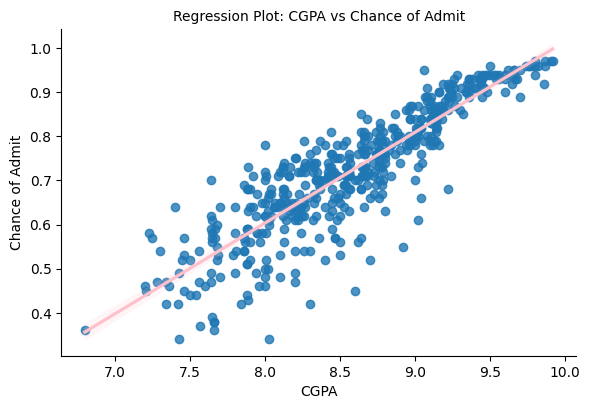

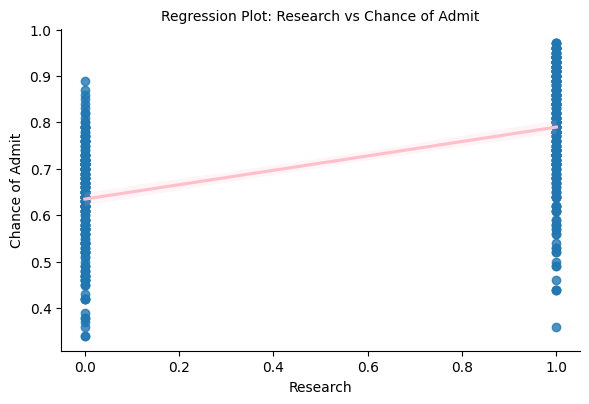

In [ ]:
# Columns to plot against 'Chance of Admit'
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

# Looping through each column and create a regression plot
for col in columns:
    sns.lmplot(data=df, x=col, y='Chance of Admit',  height=4, aspect=1.5, line_kws={'color': 'pink'})
    plt.title(f'Regression Plot: {col} vs Chance of Admit', fontsize=10)  # Add a title
    plt.xlabel(col)  # Label for x-axis
    plt.ylabel('Chance of Admit')  # Label for y-axis
    plt.show()

**INSIGHTS:**

**GRE Score:**
There is a positive linear relationship between GRE Score and Chance of Admit, suggesting that higher GRE scores increase the likelihood of admission.

**TOEFL Score:**
Similar to GRE, TOEFL scores also positively influence the Chance of Admit. Strong English proficiency correlates with higher admission chances.

**University Rating:**
The regression line shows a slight positive trend, indicating that applicants from higher-rated universities may have better admission chances.

**SOP and LOR:**
Both SOP and LOR have a weak positive relationship with Chance of Admit, suggesting that while they play a role, they are less influential than scores.

**CGPA:**
CGPA has the strongest positive relationship with Chance of Admit. This suggests academic performance is a significant factor in admissions.

**Research:**
Having research experience shows a slightly positive impact, but the trend appears weaker compared to other variables like CGPA or test scores.

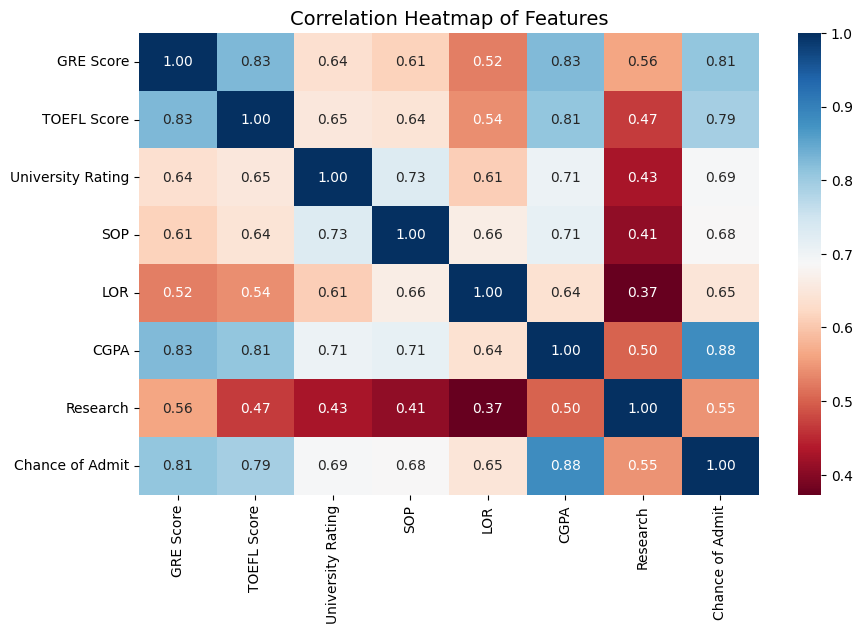

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Creating the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
    cmap="RdBu",cbar=True)

# Adding title
plt.title("Correlation Heatmap of Features", fontsize=14)

# Displaying the plot
plt.show()

## **Data Processing**

In [ ]:
'''Importing necessary libraries and modules for data preprocessing, model building,
evaluation, statistical analysis, and handling multicollinearity.'''

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sms

### **Tain-Test Split**

In [ ]:
X = df.drop(columns=[target]) #Features
y = df[target] #Target

In [ ]:
# Separating the features and target variable

X = df.drop(columns=[target])  # Dropping the target column from the feature set
y = df[target]  # Selecting the target column

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                     random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


## **Standard Scaling**

In [ ]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **Model Training** - Linear Regression

In [ ]:
# Initializing the Linear Regression model
model = LinearRegression()

# Fitting the model on training data
model.fit(x_train, y_train)

# Predicting the target variable on test data
y_pred = model.predict(x_test)


# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8188432567829631


## **Linear Regression - OLS**

---



### **Feature Importance**

In [ ]:
# Adding constant to the scaled training data
X_sm = sm.add_constant(x_train_scaled) # Adding a constant term for the intercept

# Fitting the Ordinary Least Squares (OLS) model
sm_model = sm.OLS(y_train, X_sm).fit() # Creating the model and fitting it to the training data

# Printing the summary of the model
print(sm_model.summary()) # Displaying the summary of the OLS model


                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          3.41e-142
Time:                        18:28:04   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

In [ ]:
column_names = list(x_train.columns)

# Getting the model parameters (coefficients) including the constant term
model_parameters = list(sm_model.params[1:])
modelparam2= list(sm_model.pvalues[1:])

# Creating a DataFrame to display the model coefficients with column names
coefficients = pd.DataFrame({'Variable': column_names, 'Coefficient': model_parameters, 'P-Value': modelparam2})
print(coefficients)

            Variable  Coefficient       P-Value
0          GRE Score     0.026671  3.357625e-05
1        TOEFL Score     0.018226  1.619658e-03
2  University Rating     0.002940  5.414408e-01
3                SOP     0.001788  7.211636e-01
4                LOR     0.015866  1.947965e-04
5               CGPA     0.067581  1.086636e-22
6           Research     0.011940  1.337508e-03


It is clear from above that 'University Rating' has p-value>0.05 , signifying that the feature have no statistically significant effect on the dependent variable

Therefore, we shall remove the feature and re-train the model

In [ ]:
#Retraining the model after removing unwanted feature

In [ ]:
x = df.drop(columns=['Chance of Admit','University Rating', 'SOP'])
y = df[['Chance of Admit']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     random_state=42)

In [ ]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both training & test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
X_sm = sm.add_constant(x_train_scaled)

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.36e-144
Time:                        18:28:04   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.830      0.0

In [ ]:
column_names = list(x_train.columns)

# Getting the model parameters (coefficients) including the constant term
model_parameters = list(sm_model.params[1:])
modelparam2= list(sm_model.pvalues[1:])

# Creating a DataFrame to display the model coefficients with column names
coefficients = pd.DataFrame({'Variable': column_names, 'Coefficient': model_parameters, 'P-Value': modelparam2})
print(coefficients)

      Variable  Coefficient       P-Value
0    GRE Score     0.026879  2.731841e-05
1  TOEFL Score     0.019106  7.667483e-04
2          LOR     0.017207  1.045150e-05
3         CGPA     0.069066  2.882599e-25
4     Research     0.012226  9.557871e-04


The columns University Rating and SOP were dropped because their p-values were greater than 0.05, indicating that they were not statistically significant predictors of the Chance of Admit. Including these variables could have added noise to the model without improving its predictive power, potentially affecting the overall accuracy and interpretability.

**Insights:**

*  All remaining predictors (GRE Score, TOEFL Score, LOR, CGPA, and Research) have very low p-values (all below 0.001), indicating that they are statistically significant contributors to predicting the Chance of Admit.

*  CGPA has the highest coefficient (0.069), this indicates that a higher CGPA has the strongest positive impact on admission chances.

*  The R-squared value of 0.821 indicates that 82.1% of the variability in the Chance of Admit is explained by the model, demonstrating a strong fit.

*  The F-statistic (360.8) and its extremely low p-value (1.36e-144) confirm that the model is statistically significant, meaning the predictors collectively explain a significant amount of the variance in Chance of Admit.

*  While CGPA is the most influential variable, GRE Score and TOEFL Score also have meaningful coefficients (0.026 and 0.019, respectively), suggesting that academic test scores also play an important role in admission likelihood, though their impacts are smaller compared to CGPA.

## **Test Assumption of Linear Regression Model**

Testing assumptions in linear regression ensures that the model's results are valid, reliable, and interpretable. Assumptions like linearity, normality of residuals, homoscedasticity, and absence of multicollinearity ensure the accuracy of coefficient estimates and hypothesis tests.

1. **No Multicollinearity** :  Multicollinearity occurs when independent variables are highly correlated with each other, leading to instability in coefficient estimates.

 **Test:**
Check the Variance Inflation Factor (VIF). Variables with a VIF > 5 (or 10, depending on the context) indicate high multicollinearity.
Drop variables one by one until all VIF values are below the acceptable threshold.

2. **Mean of Residuals Should Be Close to Zero** : The residuals (differences between actual and predicted values) should have a mean close to zero to ensure unbiased predictions.

3. **Linear Relationship Between Independent and Dependent Variables**:
 A linear regression model assumes a linear relationship between the predictors and the target variable.

4. **Test for Homoscedasticity** (Constant Variance of Errors): The variance of residuals should remain constant across all levels of the predicted values.
 **Test**:
Create a scatterplot of residuals vs. predicted values. The residuals should be randomly dispersed without any clear pattern.
Perform the Goldfeld-Quandt Test: If the p-value > 0.05, there is no strong evidence of heteroscedasticity.

5. **Normality of Residuals**: The residuals should follow a normal distribution to ensure the validity of hypothesis testing and confidence intervals.

6. **No Autocorrelation of Residuals**: Residuals should not be correlated with each other

7. **Impact of Outliers**: Outliers can significantly influence the regression model by distorting coefficients and residual patterns.


### **Multicollinearity Check**

In [ ]:
# Creating an empty DataFrame to store VIF values for the features
vif = pd.DataFrame()

# Converting the scaled training data into a DataFrame with feature names
X_t = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Adding the feature names to the VIF DataFrame
vif['Features'] = X_t.columns

# Calculating the VIF for each feature using the Variance Inflation Factor function
# Looping through each feature index in the scaled data
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]

# Rounding the VIF values to 2 decimal places
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the features by VIF values in descending order for better interpretability
vif = vif.sort_values(by="VIF", ascending=False)

# Displaying the VIF DataFrame to check multicollinearity among features
vif

,Features,VIF
0,GRE Score,4.47
3,CGPA,4.28
1,TOEFL Score,3.54
2,LOR,1.66
4,Research,1.50


VIF of all the features are less than 5, which means that the features are not excessively correlated, and each variable is contributing unique information to the model.

### **Mean of Residual**

In [ ]:

# Adding constant to the scaled test data
X_test_sm = sm.add_constant(x_test_scaled)

# Predicting the target variable for the test dataset
y_pred_test = sm_model.predict(X_test_sm)


y_test_values = y_test.values.flatten()  # Convert to 1D array

# calculating the mean of residuals for the test dataset
residuals_test = y_test_values - y_pred_test
mean_residuals_test = np.mean(residuals_test)

# Printing the mean of residuals for the test dataset
print("Mean of Residuals (Test Data):", mean_residuals_test)

Mean of Residuals (Test Data): -0.005305947942349201


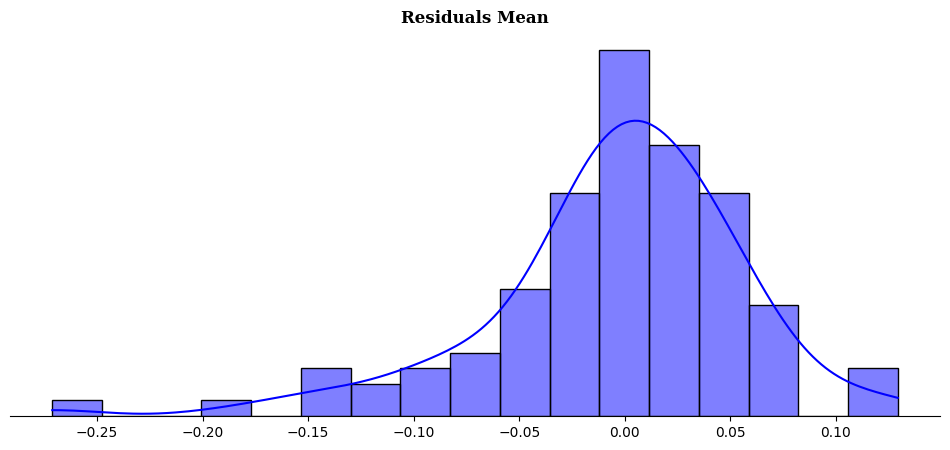

In [ ]:
plt.figure(figsize=(12,5)) # Setting the figure size
sns.histplot(residuals_test, kde= True,color='blue') #Creating the plot
plt.title('Residuals Mean',fontsize=12,fontfamily='serif',fontweight='bold') #Adding the title
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

*  The residuals are approximately centered around zero, indicating that the model has a balanced prediction error with no systematic bias.

*  The distribution of residuals is close to normal, supporting the assumption of normally distributed errors in linear regression.

### **Linearity between Dependent and Independent variables**

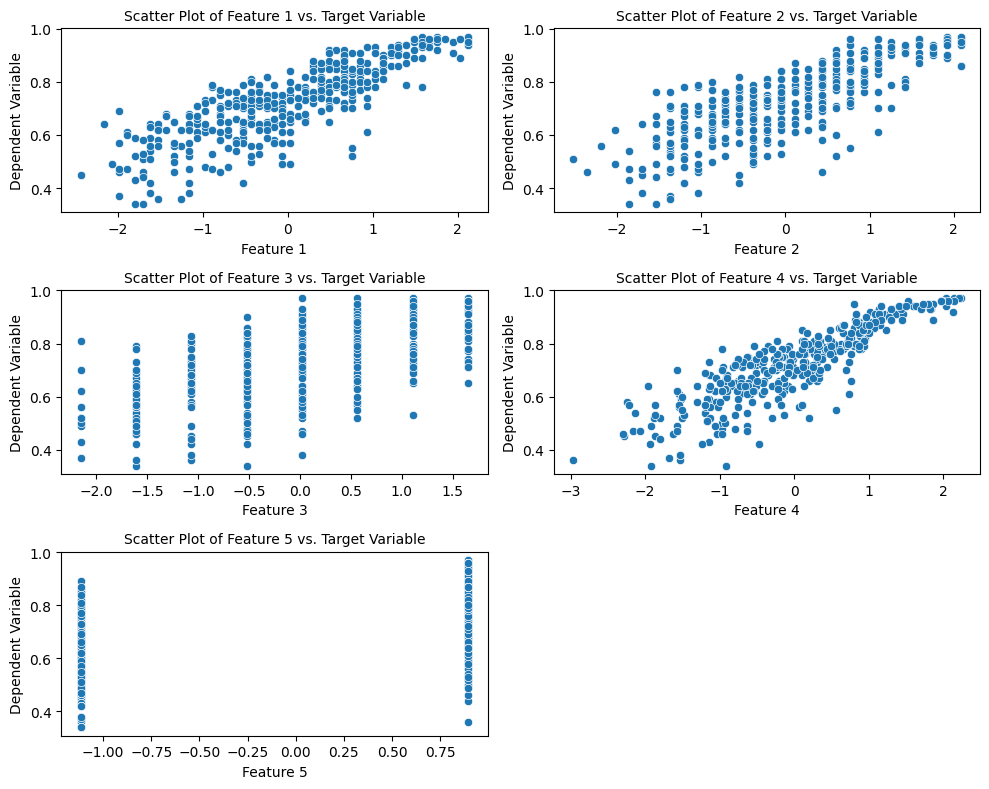

In [ ]:
y_train_1d = np.array(y_train).reshape(-1)

# Creating subplots for each independent variable against the dependent variable
num_features = x_train_scaled.shape[1]  # Number of independent variables

plt.figure(figsize=(10, 8))  # Setting the figure size for multiple subplots
for i in range(num_features):

    plt.subplot((num_features + 1) // 2, 2, i + 1)  # Creating subplots in a grid format
    sns.scatterplot(x=x_train_scaled[:, i].reshape(-1), y=y_train_1d)  # Reshaped to 1D array
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Dependent Variable')
    plt.title(f'Scatter Plot of Feature {i + 1} vs. Target Variable', fontsize = 10)

plt.tight_layout()
plt.show()

**Feature 1(GRE Score)** shows a strong positive linear relationship with the target variable, indicating it is a good predictor of admission chances.

**Feature 2(CGPA)** also displays a positive relationship but is less pronounced compared to Feature 1, suggesting it contributes meaningfully but not as strongly.

**Feature 3(TOEFL Score)** has a weak relationship with the target variable, indicating it may not be as useful for predicting admission chances.

**Feature 4(LOR)** exhibits a strong positive correlation with the target variable, suggesting it is a key predictor in the model.

**Feature 5(Research)** shows no significant relationship with the target variable, suggesting it may not be useful for predicting admission chances in the model.

The scatter plots help identify which features are most relevant for predicting admission chances, guiding effective model selection and feature inclusion.

## **Homoskedasticity Test**

Homoskedasticity refers to the condition in a linear regression model where the residuals (errors) have constant variance across all levels of the independent variable(s). This assumption is important because it ensures that the prediction errors are consistent, meaning the errors are not more spread out at higher or lower values of the independent variables. If this assumption is violated, it can lead to biased estimates and reduced efficiency of the regression model. Testing for homoskedasticity involves creating scatterplots of residuals versus fitted values and using statistical tests like the Goldfeld-Quandt test to detect any heterogeneity in residual variance.

In [ ]:
print(y_train.columns)

Index(['Chance of Admit'], dtype='object')


In [ ]:
Y_hat = sm_model.predict(X_sm)  # Predicting the target variable using the fitted model

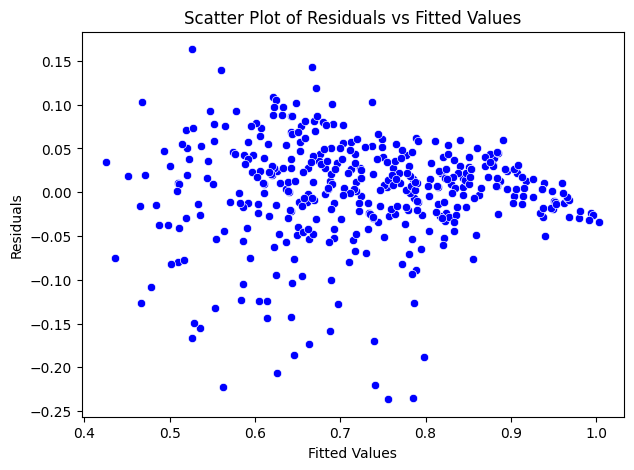

In [ ]:
y_train_1d = np.array(y_train).flatten()

# Predicting the target variable
y_hat = sm_model.predict(X_sm)

# Calculating residuals
residuals = y_train_1d - y_hat

# Creating a scatter plot of residuals vs fitted values
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_hat, y=residuals, color='blue')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals vs Fitted Values')
plt.show()

*   ###   **Goldfeld-Quandt Test**

In [ ]:
from statsmodels.compat import lzip  # For compatibility with older versions of statsmodels

'''Using lzip along with sms.het_goldfeldquandt
allows to directly zip the test statistic and p-value
with their respective names, making the code cleaner and more readable.'''

# Performing the Goldfeld-Quandt test
name = ['F statistic', 'p-value'] # 'name' list stores the names for the F statistic and p-value

#'sms.het_goldfeldquandt' function takes the dependent variable (y_train) and the independent variables (X_sm) as inputs
test = sms.het_goldfeldquandt(y_train, X_sm)

# Zipping the test statistic and p-value with their names for easier readability
lzip(name, test)

[('F statistic', 0.9592288620962849), ('p-value', 0.6139024845884469)]

The Goldfeld-Quandt test results indicate that the F statistic is 0.96 and the p-value is 0.61. Given that the p-value is greater than 0.05, there is no strong evidence of heteroscedasticity in the residuals, suggesting that the assumptions of homoskedasticity are likely met for the model.

## **Normality of Residuals**

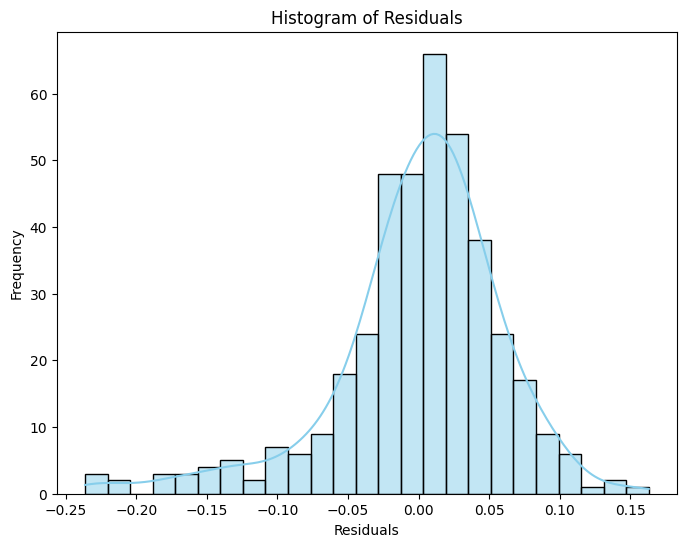

In [ ]:
# Plotting histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Clearly this histogram of residuals with the KDE overlay indicates the normality of residuals. The histogram shows a bell-shaped distribution, which is characteristic of a normal distribution. The overlayed KDE curve aligns well with the shape of the histogram, confirming that the residuals are approximately normally distributed. This supports the assumption of homoscedasticity and validates the use of OLS regression in this context.

**QQ-Plot and Shapiro-Wilk Test**

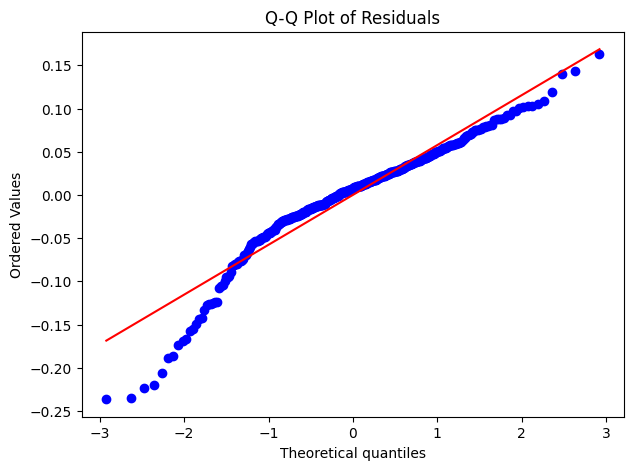

In [ ]:
# Q-Q plot for residuals
plt.figure(figsize=(7, 5))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
# Performing the Shapiro-Wilk test
stat = stats.shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {stat}")

Shapiro-Wilk Test Statistic: ShapiroResult(statistic=0.9312566782302102, pvalue=1.3099647192165179e-12)


*  From the Histplot & kdeplot , we can see that the Residuals are left skewed and not perfectly normally distributed.

*  The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not Gaussian.

*  The Shapiro-Wilk Test Statistic is close to 1, but not significantly high. It indicates that the residuals are somewhat close to a normal distribution.

### **Model Performance Evaluation**

To evaluate the model performance, we can calculate the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), R-squared, and Adjusted R-squared for both the training and testing datasets.

*  **MAE (Mean Absolute Error):**
   **mean_absolute_error(y_true, y_pred)** Computes the mean of the absolute differences between the true values and predicted values.

*  **RMSE (Root Mean Squared Error):**
   **np.sqrt(mean_squared_error(y_true, y_pred))** Computes the square root of the mean of the squared differences between the true values and predicted values.

*  **R-squared:**

   **sm_model.rsquared:** For the training set, this is the R-squared value provided by statsmodels.

   **sm_model.rsquared_adj**: Adjusted R-squared for the testing set, which adjusts for the number of features in the model.

In [ ]:
y_train_pred = sm_model.predict(X_sm)  # Predictions on training data
y_test_pred = sm_model.predict(X_test_sm)  # Predictions on testing data

# Calculating MAE (Mean Absolute Error)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculating RMSE (Root Mean sqaured Error)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculating R-squared
train_r_squared = sm_model.rsquared  # Since we are using statsmodels, it provides R-squared directly
test_r_squared = sm_model.rsquared_adj  # Adjusted R-squared

# Printing the results
print("Training set:")
print(f"MAE: {train_mae}")
print(f"RMSE: {train_rmse}")
print(f"R-squared: {train_r_squared}")
print(f"Adjusted R-squared: {sm_model.rsquared_adj}")

print("\nTesting set:")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"R-squared: {test_r_squared}")
print(f"Adjusted R-squared: {sm_model.rsquared_adj}")

Training set:
MAE: 0.04269126483606392
RMSE: 0.05944028044169098
R-squared: 0.8207326947514393
Adjusted R-squared: 0.8184577289487925

Testing set:
MAE: 0.042923455782657785
RMSE: 0.06142491974041883
R-squared: 0.8184577289487925
Adjusted R-squared: 0.8184577289487925


**Insights:**

The training and testing sets show similar performance, indicating that the model generalizes well and is not overfitting.

The R-squared value around 0.82 suggests that the model explains a significant portion of the variance in the dependent variable.

The slight differences in MAE and RMSE between the training and testing sets indicate the model’s stability and reliability across different datasets.

## **Ridge  and Lasso Regression**

*  **Lasso Regression (L1 Regularization)**:

    Lasso regression is a type of linear regression that includes a regularization term which helps in selecting relevant features by shrinking less important coefficients to zero. This makes it useful for feature selection and when dealing with high-dimensional data.

*  **Ridge Regression(L2 Regularization):**

    Ridge regression, on the other hand, applies a penalty to the size of the coefficients to prevent them from becoming too large, which helps in addressing multicollinearity and overfitting. It is particularly effective when the data has correlated predictors.

Both Lasso and Ridge regression are used to improve model performance by reducing overfitting and selecting relevant features in datasets with many predictors. Lasso is preferred when feature selection is needed, while Ridge is useful when data has multicollinearity among features.

In [ ]:
# Lasso and Ridge Regression Models Initialization
lasso_model = Lasso()  # Initializing the Lasso regression model
ridge_model = Ridge()  # Initializing the Ridge regression model

# Fitting the models to the training data
lasso_model.fit(x_train_scaled, y_train)  # Training Lasso model using scaled independent variables and target variable
ridge_model.fit(x_train_scaled, y_train)  # Training Ridge model using scaled independent variables and target variable

'''The `fit` method calculates the model coefficients and fits the model to the training data
   For Lasso, it also performs regularization which can shrink less important coefficients to zero.
   For Ridge, it penalizes the size of coefficients to prevent overfitting and multicollinearity.'''


'The `fit` method calculates the model coefficients and fits the model to the training data\n   For Lasso, it also performs regularization which can shrink less important coefficients to zero.\n   For Ridge, it penalizes the size of coefficients to prevent overfitting and multicollinearity.'

In [ ]:
lasso_predictions = lasso_model.predict(x_test_scaled)  # Predicting using Lasso model on the test set
ridge_predictions = ridge_model.predict(x_test_scaled)  # Predicting using Ridge model on the test set

# Calculating Mean Squared Error (MSE) for Lasso
print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))

# Calculating Mean Squared Error (MSE) for Ridge
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

# Calculating R^2 (Coefficient of Determination) for Lasso
print("R^2 for lasso:", lasso_model.score(x_test_scaled, y_test))

# Calculating R^2 (Coefficient of Determination) for Ridge
print('R^2 for ridge:', ridge_model.score(x_test_scaled, y_test))

test MSE for L1: 0.020598230624999995
test MSE for L2: 0.0037770066475508435
R^2 for lasso: -0.00724844132029312
R^2 for ridge: 0.8153052984082717


In [ ]:
lasso_train_predictions = lasso_model.predict(x_train_scaled)  # Predicting using Lasso model on the training set
ridge_train_predictions = ridge_model.predict(x_train_scaled)  # Predicting using Ridge model on the training set

# Calculating Mean Squared Error (MSE) for Lasso on training set
print('train MSE for L1:', mean_squared_error(y_train, lasso_train_predictions))

# Calculating Mean Squared Error (MSE) for Ridge on training set
print('train MSE for L2:', mean_squared_error(y_train, ridge_train_predictions))

# Calculating R^2 for Lasso on training set
print("R^2 for lasso:", lasso_model.score(x_train_scaled, y_train))

# Calculating R^2 for Ridge on training set
print('R^2 for ridge:', ridge_model.score(x_train_scaled, y_train))

train MSE for L1: 0.019708819375
train MSE for L2: 0.003533209387622887
R^2 for lasso: 0.0
R^2 for ridge: 0.8207295261884306


**Test Set Performance:**

The test MSE for Lasso is higher than that for Ridge regression, indicating that Ridge performs better in terms of accuracy when predicting unseen data.
The R^2 value for Lasso is negative, which suggests a poor fit of the model to the test data. In contrast, Ridge maintains a positive R^2 value, indicating better generalization to unseen data.

**Training Set Performance:**

Both Lasso and Ridge show very low R^2 values on the training set (Lasso: 0.0, Ridge: 0.82), highlighting that while the model performs well on training data, it does not necessarily translate well to test data.
The MSE values are also quite low, particularly for Ridge, suggesting that Ridge is more effective at minimizing prediction errors in the training phase compared to Lasso.


These insights suggest that **Ridge regression** might be more appropriate for the dataset, especially considering its better generalization to unseen data compared to Lasso

## **Identifying the Best Model**

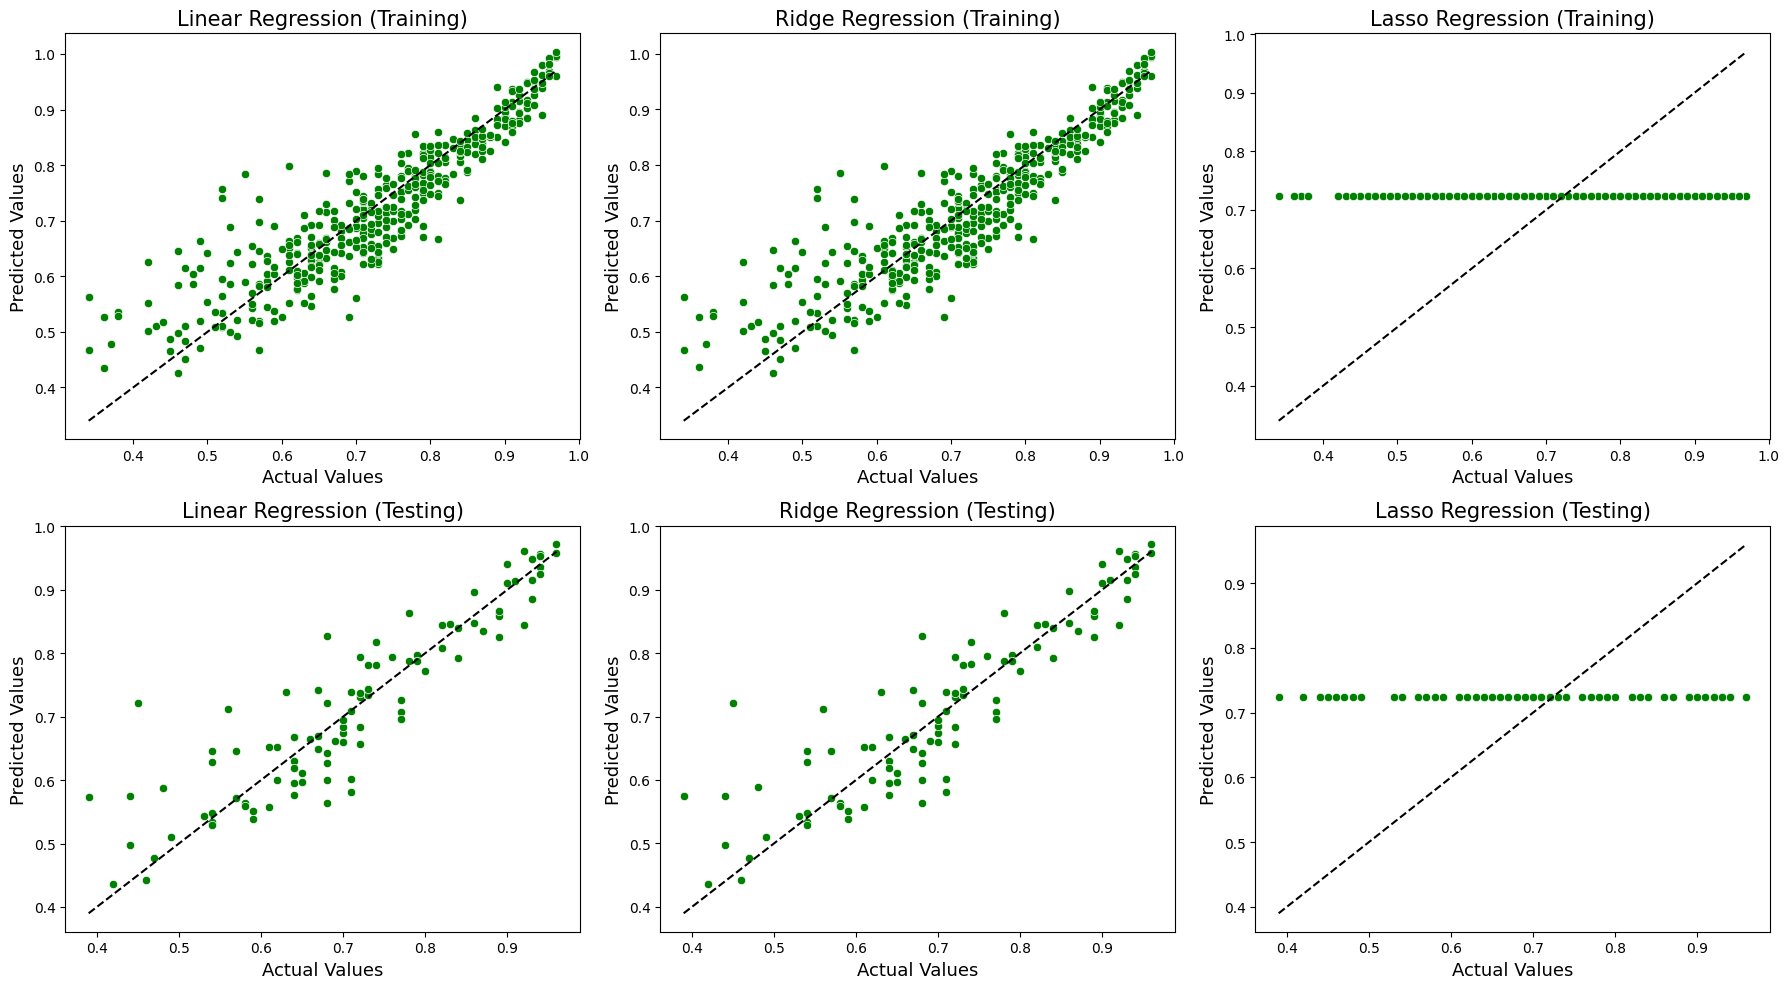

In [ ]:
# Reshaping the actual values for training and testing
actual_train = y_train.values.reshape((-1,))
actual_test = y_test.values.reshape((-1,))

# Predictions for different models on training and testing data
predicted_train_values = [
    Y_hat.reshape((-1,)),  # Predictions from Linear Regression (Training)
    ridge_train_predictions.reshape((-1,)),  # Predictions from Ridge Regression (Training)
    lasso_train_predictions.reshape((-1,))  # Predictions from Lasso Regression (Training)
]

predicted_test_values = [
    y_pred_test.reshape((-1,)),  # Predictions from Linear Regression (Testing)
    ridge_predictions.reshape((-1,)),  # Predictions from Ridge Regression (Testing)
    lasso_predictions.reshape((-1,))  # Predictions from Lasso Regression (Testing)
]

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

# Plotting setup for 6 subplots
plt.figure(figsize=(18, 10))
i = 1

# Looping through each model and plot comparison for training data
for preds in predicted_train_values:
    ax = plt.subplot(2, 3, i)
    sns.scatterplot(x=actual_train, y=preds, color = 'green')  # actual vs predicted values (Training)
    plt.plot([min(actual_train), max(actual_train)], [min(actual_train), max(actual_train)], 'k--')  # Line of perfect prediction
    plt.xlabel('Actual Values', fontsize = 13)  # Label for x-axis
    plt.ylabel('Predicted Values', fontsize = 13)  # Label for y-axis
    plt.title(f'{models[i-1]} (Training)', fontsize = 15)  # Title for each subplot
    i += 1

# Looping through each model and plot comparison for testing data
for preds in predicted_test_values:
    ax = plt.subplot(2, 3, i)
    sns.scatterplot(x=actual_test, y=preds, color = 'green')  # actual vs predicted values (Testing)
    plt.plot([min(actual_test), max(actual_test)], [min(actual_test), max(actual_test)], 'k--')  # Line of perfect prediction
    plt.xlabel('Actual Values', fontsize = 13)  # Label for x-axis
    plt.ylabel('Predicted Values', fontsize = 13)  # Label for y-axis
    plt.title(f'{models[i-4]} (Testing)', fontsize = 15)  # Title for each subplot
    i += 1

plt.tight_layout()
plt.show()

**Linear Regression:**
*  The scatterplots for both training and testing datasets indicate a fairly consistent alignment of predicted values with the actual values along the diagonal. However, some deviations are visible, especially for extreme values.
*  This suggests that Linear Regression performs decently but may suffer from slight underfitting or overfitting in certain regions of the data.

**Ridge Regression:**
*  The Ridge Regression scatterplots for training and testing datasets show a strong alignment of predicted values with the actual values. The points are closer to the diagonal line compared to Linear Regression, suggesting better generalization.
*  This indicates that Ridge Regression effectively handles regularization, reducing overfitting, and maintains robust predictions for both datasets.

**Lasso Regression:**
*  For Lasso Regression, the scatterplots reveal a concerning issue where the predicted values are constant for both training and testing datasets. This indicates that the model has overly simplified and ignored key features, which is the reason why the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable.
*  This is a sign of underfitting, making Lasso unsuitable for this dataset or requiring hyperparameter tuning.

**Comparison:**
*  **Ridge Regression emerges as the better model in this case**, with strong alignment between actual and predicted values and minimal overfitting or underfitting.
*  Linear Regression performs moderately well but does not match Ridge Regression's consistency.
*  Lasso Regression fails to capture the data's variability, making it the least effective model.

# **Business Insights**

**Model Evaluation:**
* The Lasso regression model has a zero R-squared value, indicating that it fails to capture any variance in the target variable (Chance of Admit) and predicts the same value for all instances. This is likely due to overly aggressive coefficient shrinking and feature selection, leading to underfitting.
* Both Linear Regression and Ridge Regression perform significantly better, capturing up to 82% of the variance in the target variable. This demonstrates their ability to model the relationships in the data effectively.

**Feature Importance:**
* The target variable (Chance of Admit) shows a strong positive correlation with CGPA, GRE Score, and TOEFL Score.
* Research experience has a weak positive correlation with the other factors but still contributes meaningfully to the model.
* CGPA holds the highest weight among features, followed by GRE Score, TOEFL Score, LOR, and Research, emphasizing their strength in predicting the chance of admission.

**University and SOP Ratings:**
* Most students belong to universities with a rating of 3, followed by 2 and 4.
* The majority of students have a Statement of Purpose (SOP) rating of 4, followed by 3.5 and 3.
* Students with higher university ratings (5 and 4) and stronger SOP ratings (5) tend to have a higher chance of admission. However, these ratings have p-values > 0.05, signifying no statistically significant effect on the dependent variable and were thus excluded from the final model.

**Letter of Recommendation (LOR):**
* Students with an LOR rating of 3 represent the largest group in the dataset.
* A strong LOR rating (5) correlates with the highest chances of admission.

**Research Experience:**
* Students with research experience are observed to have a higher chance of admission, underscoring the importance of research as a differentiating factor in admission decisions.

**Statistical Validation:**
*  After removing statistically insignificant features (University Rating and SOP), the Condition Number reduces to 4.76, indicating no multicollinearity.
*  A low Prob(F-statistic) value confirms that the model is statistically significant.

**Model Performance:**
*  The Linear Regression model performs well on both training and testing datasets, with low MAE and RMSE values and high R-squared and adjusted R-squared values. This indicates that the model is not overfitting or underfitting the data.

**Additional Observations:**
*  Chance of Admit is highest for students from universities with a rating of 5 and SOP strength of 5, gradually decreasing for lower ratings.
*  Students with higher LOR strength (5) also have better admission chances.

# **Recommendations**

*  Encourage students to focus on improving GRE scores, CGPA, and the quality of Letters of Recommendation (LOR). These factors are critical in influencing admission chances and significantly affect the likelihood of acceptance into desired programs.

*  **Collect a wider range of data** beyond academic metrics to better capture applicants' holistic profiles. This includes incorporating information on extracurricular achievements, personal statements, and diversity factors. A more comprehensive dataset will provide a fuller picture of an applicant's strengths and potential.

* **Data Augmentation:** Consider the use of data augmentation techniques to enhance the dataset. This could involve increasing the diversity of data points, such as by including non-academic achievements, work experience, internships, and participation in relevant activities. These additional features can provide a more accurate prediction model by capturing a broader spectrum of skills and experiences.

*  **Feature Enhancement:** To further refine predictive models, enhance existing features by combining them with additional diverse data points. This could include incorporating research experience, work history, and involvement in extracurricular activities. Such enhancements can significantly improve the model's ability to predict admission chances effectively.